In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
train_data = pd.read_csv('/home/karen/Documents/Datasets/turtle rescue dataset/train.csv')
capture_site = pd.read_csv('/home/karen/Documents/Datasets/turtle rescue dataset/CaptureSite_category.csv')
variable_definitions = pd.read_csv('/home/karen/Documents/Datasets/turtle rescue dataset/variable_definitions.csv', encoding='cp1252')

In [12]:
train_data.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [13]:
capture_site.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [14]:
train_data.isnull().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                        0
Tag_2                        0
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       41
Status                    3633
ReleaseSite                 75
Date_TimeRelease          6108
dtype: int64

Text(18024.02, 20.0, '100%')

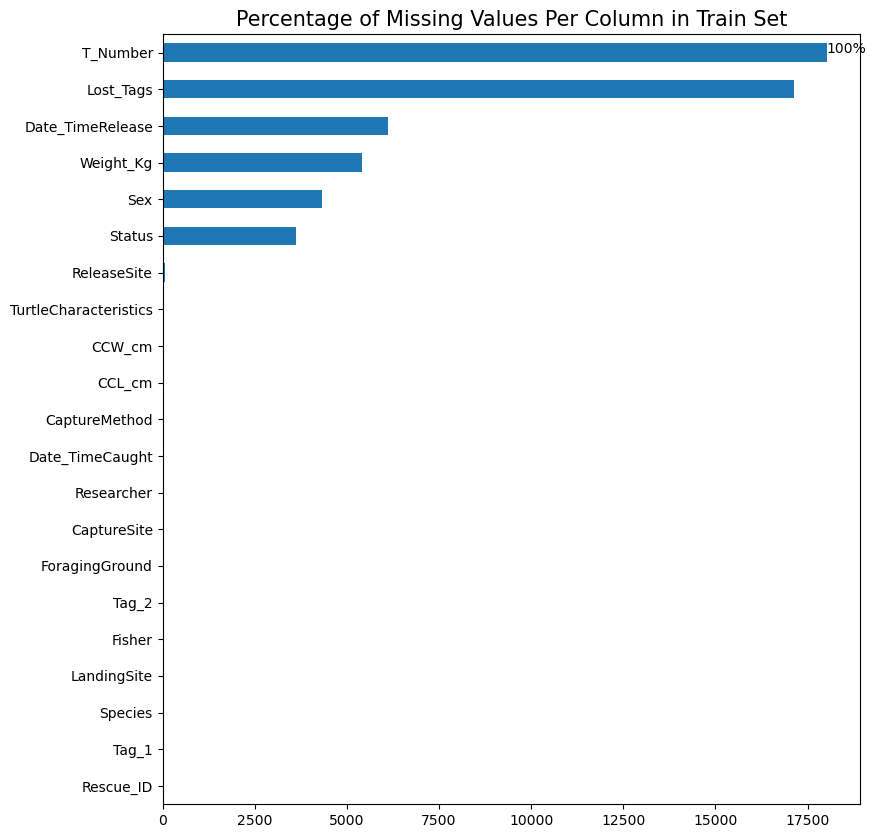

In [15]:
# Plot showing missing values in train set
ax = train_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
ax.annotate(percentage,(x,y))

In [16]:
train_data.drop(['T_Number', 'Lost_Tags'], axis=1, inplace=True)

In [17]:
train_data.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Tag_2', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease'],
      dtype='object')

In [18]:
capture_site.CaptureSite.nunique()

29